| Übungszettel 12 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 15.07.21 23.15 Uhr |
| Studierende | *bitte Vor- und Nachnamen einfügen* |

### Aufgabe: LR-/QR-Zerlegung mit Nachiteration

1. Implementieren Sie eine Funktion die iterativ Fehlerkorrekturen für das Gleichungssystem $$A x = b$$ mithilfe der Funktion `solve_lr(...)` (vorheriges Übungsblatt) berechnet. Es sei $k$ die Anzahl der Iterationen, sodass für $k=1$ das iterative Verfahren mit `solve_lr(...)` übereinstimmt. Für $k \geq 2$ sprechen wir von einem [LR-Verfahren mit Nachiteration](https://de.wikipedia.org/wiki/Gau%C3%9Fsches_Eliminationsverfahren#Nachiteration). Diskutieren sie die Resultate für verschiedene $k$ bzgl. einer $(n \times n)$ - Hilbertmatrix $A$, $n = 5,\ldots,20$.

2. Implementieren Sie ein direktes Lösungsverfahren `solve_qr(...)` basierend auf der QR-Zerlegung `scipy.linalg.qr(...)`. Verwenden Sie in 1. das QR- anstatt des LR-Verfahrens und vergleichen Sie die Resultate.

3. Diskutieren Sie 1. und 2. für eine $(n \times n)$ - Pascalmatrix $A$, $n = 5,\ldots,20$. Verwenden Sie `scipy.linalg.pascal(n)`.

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def solve_qr(a, b):
    q, r = la.qr(a)
    return la.solve_triangular(r, q.T @ b)

def solve_lr(A, b):
    return la.lu_solve(la.lu_factor(A), b)

def solve(A, b, k = 1, qr = False):
    x = solve_qr(A, b) if qr else solve_lr(A, b)
    for i in range(1, k):
        r = b - (A @ x)
        x += solve_qr(A, r) if qr else solve_lr(A, r)
    return x

def test(n, k = 1, qr = False, pascal = False):
    a = la.pascal(n) if pascal else la.hilbert(n)
    x_1 = np.ones(n)
    b = a @ x_1
    x_2 = solve(a, b, k, qr)
    
    error = x_1 - x_2
    
    error_1 = np.sum(np.abs(error))
    error_2 = np.sqrt(np.sum(error**2))
    error_inf = np.max(np.abs(error))
    
    res = (a @ x_2) - b
    
    res_1 = np.sum(np.abs(res))
    res_2 = np.sqrt(np.sum(res**2))
    res_inf = np.max(np.abs(res))
    
    return (error_1, error_2, error_inf, res_1, res_2, res_inf)

def plot(qr = False, pascal = False):
    best = [{} for i in range(21)]
    kmax = 100
    error_1 = np.zeros(16 * kmax)
    error_2 = np.zeros(16 * kmax)
    error_inf = np.zeros(16 * kmax)
    res_1 = np.zeros(16 * kmax)
    res_2 = np.zeros(16 * kmax)
    res_inf = np.zeros(16 * kmax)

    for i in range(error_1.size):
        (error_1[i], error_2[i], error_inf[i], res_1[i], res_2[i], res_inf[i]) = test(i//kmax + 5, i % kmax + 1, qr, pascal)

    for i in range(0, 16 * kmax, kmax):
        n = i//kmax + 5
        j = error_1[i:i + kmax].argmin()
        best[n]['e_1'] = (j % kmax + 1, error_1[i + j])
        j = error_2[i:i + kmax].argmin()
        best[n]['e_2'] = (j % kmax + 1, error_2[i + j])
        j = error_inf[i:i + kmax].argmin()
        best[n]['e_inf'] = (j % kmax + 1, error_inf[i + j])
        j = res_1[i:i + kmax].argmin()
        best[n]['r_1'] = (j % kmax + 1, res_1[i + j])
        j = res_2[i:i + kmax].argmin()
        best[n]['r_2'] = (j % kmax + 1, res_2[i + j])
        j = res_inf[i:i + kmax].argmin()
        best[n]['r_inf'] = (j % kmax + 1, res_inf[i + j])
        
        plt.figure()
        plt.plot(np.arange(1, kmax + 1), error_1[i: i + kmax], label = r'$|| x - x^*||_1$')
        plt.plot(np.arange(1, kmax + 1), error_2[i: i + kmax], label = r'$|| x - x^*||_2$')
        plt.plot(np.arange(1, kmax + 1), error_inf[i: i + kmax], label = r'$|| x - x^*||_\infty$')
        plt.plot(np.arange(1, kmax + 1), res_1[i: i + kmax], label = r'$|| Hx - b||_1$')
        plt.plot(np.arange(1, kmax + 1), res_2[i: i + kmax], label = r'$|| Hx - b||_2$')
        plt.plot(np.arange(1, kmax + 1), res_inf[i: i + kmax], label = r'$|| Hx - b ||_\infty$')
        plt.xlabel("k")
        plt.title(f"n = {n}")
    
    return best

---
1
---

n = 5:
e_1   (1, 1.2762013668066174e-12)
e_2   (1, 7.811445018889777e-13)
e_inf (1, 6.16839912481737e-13)
r_1   (1, 1.1102230246251565e-16)
r_2   (1, 1.1102230246251565e-16)
r_inf (1, 1.1102230246251565e-16)
n = 6:
e_1   (2, 2.7635227439759547e-11)
e_2   (2, 1.5342552980153477e-11)
e_inf (2, 1.2531531368153992e-11)
r_1   (2, 0.0)
r_2   (2, 0.0)
r_inf (2, 0.0)
n = 7:
e_1   (3, 5.411809567146264e-08)
e_2   (3, 2.7814994758263894e-08)
e_inf (3, 1.899151569340063e-08)
r_1   (3, 0.0)
r_2   (3, 0.0)
r_inf (3, 0.0)
n = 8:
e_1   (15, 1.076531809252046e-07)
e_2   (15, 5.3339008174073755e-08)
e_inf (15, 3.662542646942768e-08)
r_1   (14, 4.440892098500626e-16)
r_2   (14, 2.7194799110210365e-16)
r_inf (1, 2.220446049250313e-16)
n = 9:
e_1   (11, 5.257026217675431e-07)
e_2   (11, 2.736162627909634e-07)
e_inf (11, 1.9356650238222528e-07)
r_1   (82, 4.440892098500626e-16)
r_2   (82, 2.7194799110210365e-16)
r_inf (1, 2.220446049250313e-16)
n = 10:
e_1   (80, 2.4289622622353235e-05)
e_2   (80, 1.206059

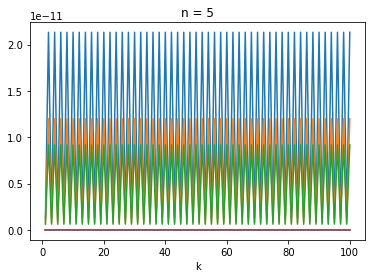

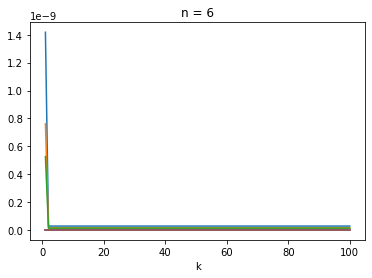

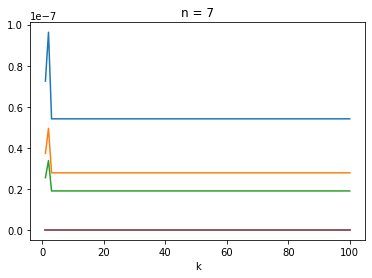

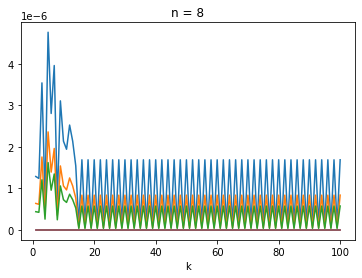

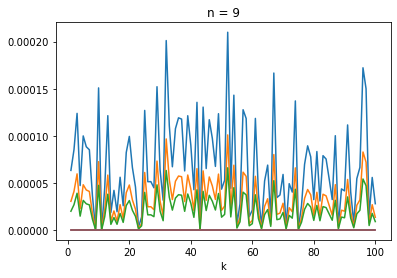

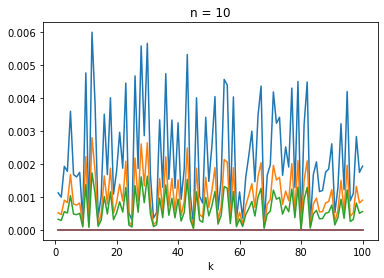

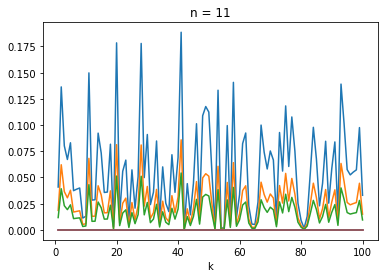

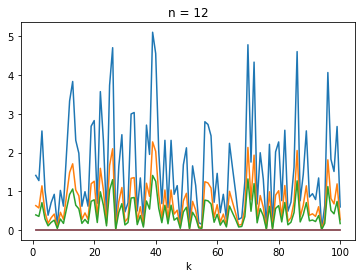

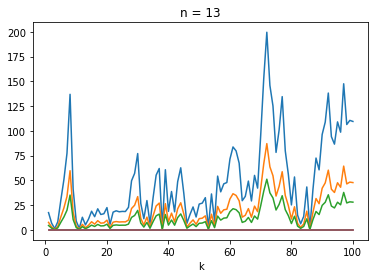

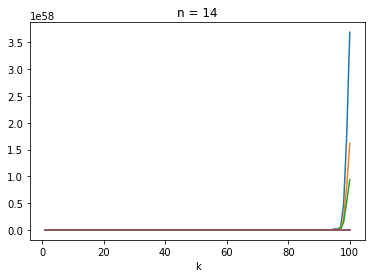

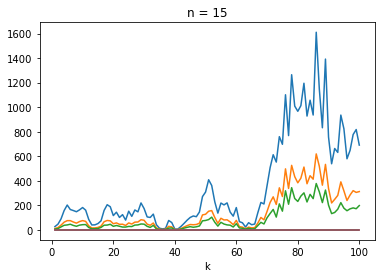

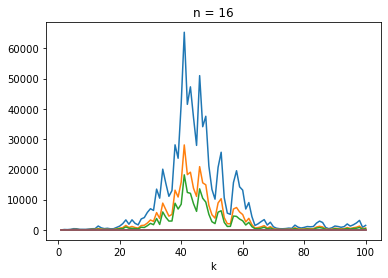

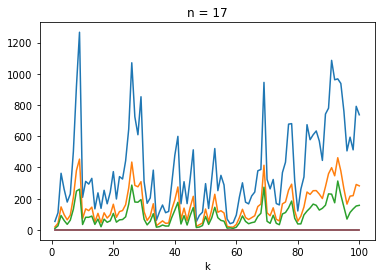

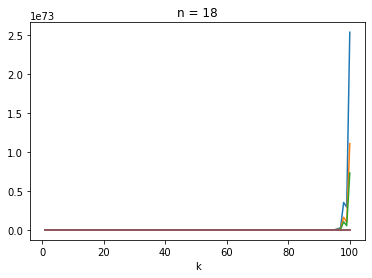

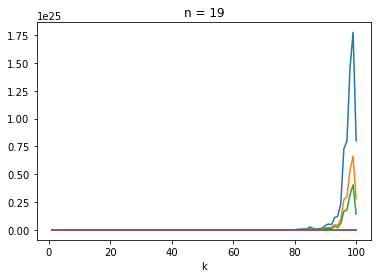

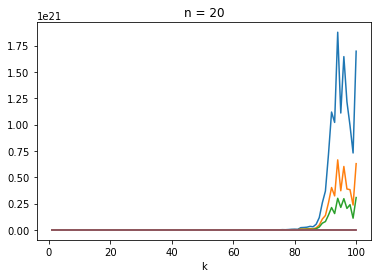

In [3]:
best = plot()
for i in range(21):
    if best[i]:
        print(f'n = {i}:')
        for k in best[i]:
            print(f'{k:<6}{best[i][k]}')

Fuer die meisten n kann durch nachiteration ein besseres ergebnis erzielt werden, es gibt jedoch starke schwankungen fuer verschiedene werte k wobei fuer einige k das ergebnis sogar deutlich schlechter wird. Fuer die groessten betrachteten matrizen ist das ergebnis mit jeder weiteren iteration nur deutlich schlechter geworden.

---
2
---

n = 5:
e_1   (3, 2.6785018647501602e-11)
e_2   (3, 1.5163469801251572e-11)
e_inf (3, 1.1683765066550222e-11)
r_1   (3, 2.220446049250313e-16)
r_2   (3, 2.220446049250313e-16)
r_inf (3, 2.220446049250313e-16)
n = 6:
e_1   (2, 2.1207291478475554e-10)
e_2   (2, 1.1316449091695629e-10)
e_inf (2, 7.599365581256734e-11)
r_1   (2, 3.3306690738754696e-16)
r_2   (2, 2.482534153247273e-16)
r_inf (2, 2.220446049250313e-16)
n = 7:
e_1   (3, 2.0146411094934535e-08)
e_2   (3, 1.0315811416259218e-08)
e_inf (3, 7.07770320129697e-09)
r_1   (2, 1.1102230246251565e-16)
r_2   (2, 1.1102230246251565e-16)
r_inf (2, 1.1102230246251565e-16)
n = 8:
e_1   (18, 3.4514039026767307e-07)
e_2   (18, 1.7151224749505722e-07)
e_inf (18, 1.1801068366956713e-07)
r_1   (43, 2.220446049250313e-16)
r_2   (43, 2.220446049250313e-16)
r_inf (2, 2.220446049250313e-16)
n = 9:
e_1   (4, 2.738770882304564e-07)
e_2   (4, 1.3601709104448165e-07)
e_inf (4, 9.344992490945003e-08)
r_1   (45, 2.220446049250313e-16)
r_2   (45, 1.57009245

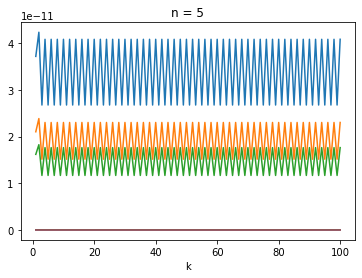

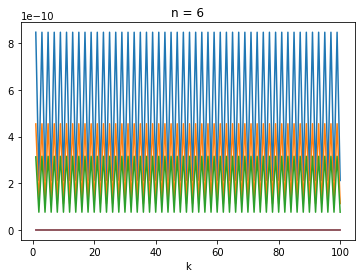

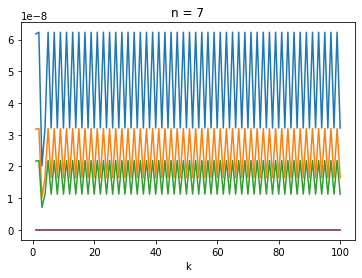

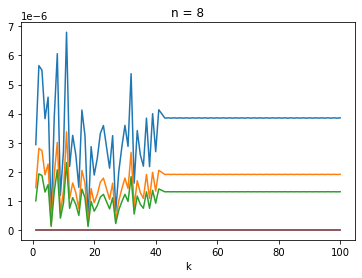

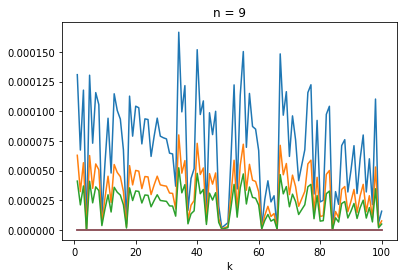

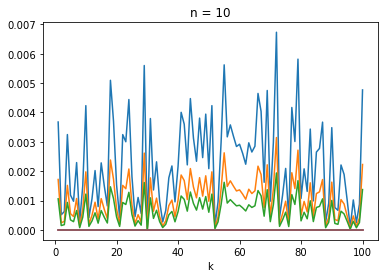

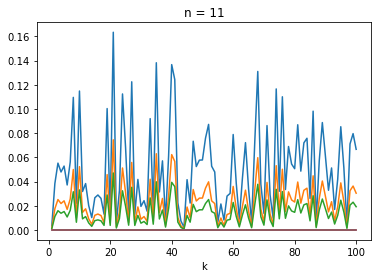

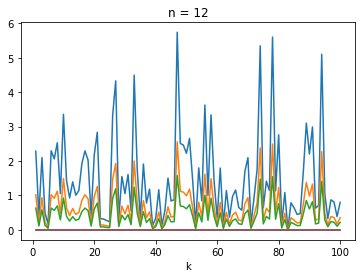

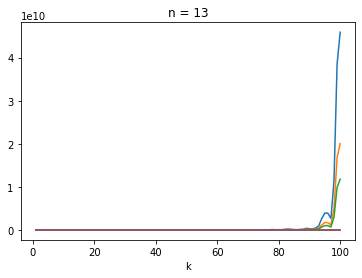

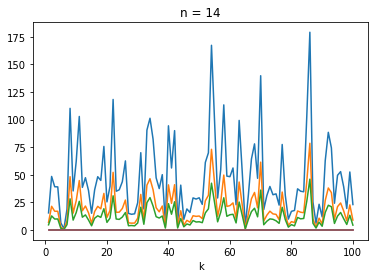

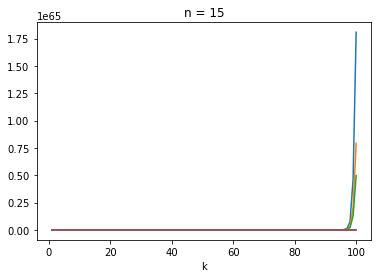

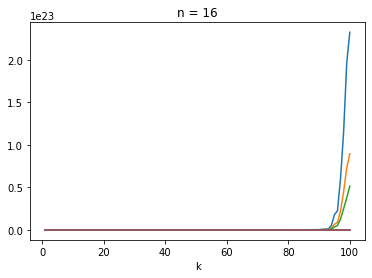

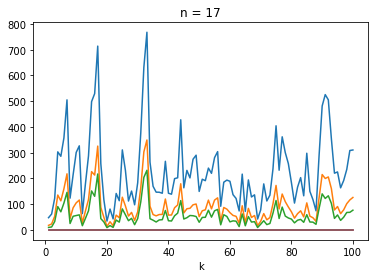

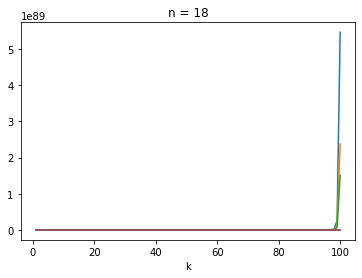

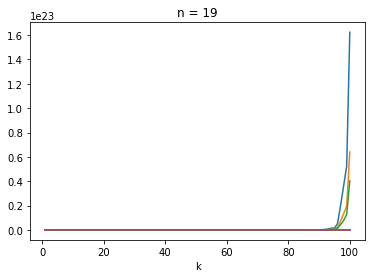

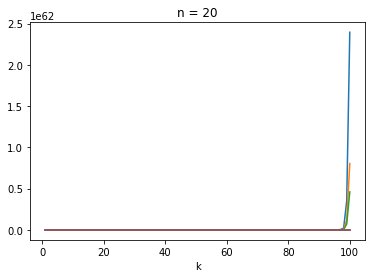

In [4]:
best = plot(True)
for i in range(21):
    if best[i]:
        print(f'n = {i}:')
        for k in best[i]:
            print(f'{k:<6}{best[i][k]}')

mit dem qr verfahren sind oft weniger nachiterationen noetig als beim lr verfahren um auf vergleichbare ergebnisse zu kommen. bei den groesseren matrizen scheint das qr verfahren hier schlechtere ergebnisse zu liefern.

---
3
---

n = 5:
e_1   (1, 0.0)
e_2   (1, 0.0)
e_inf (1, 0.0)
r_1   (1, 0.0)
r_2   (1, 0.0)
r_inf (1, 0.0)
n = 6:
e_1   (2, 2.1062041000163845e-12)
e_2   (2, 1.042504841165975e-12)
e_inf (2, 6.851186284961841e-13)
r_1   (2, 0.0)
r_2   (2, 0.0)
r_inf (2, 0.0)
n = 7:
e_1   (2, 4.8405723873656825e-12)
e_2   (2, 2.2533091977948316e-12)
e_inf (2, 1.4448442442471787e-12)
r_1   (2, 0.0)
r_2   (2, 0.0)
r_inf (2, 0.0)
n = 8:
e_1   (1, 7.569478377433825e-11)
e_2   (1, 3.6690565598485524e-11)
e_inf (1, 2.5146107418549946e-11)
r_1   (2, 1.4210854715202004e-14)
r_2   (2, 1.4210854715202004e-14)
r_inf (2, 1.4210854715202004e-14)
n = 9:
e_1   (1, 1.0279560536119448e-09)
e_2   (1, 4.5375007185954054e-10)
e_inf (1, 2.769305895711227e-10)
r_1   (2, 0.0)
r_2   (2, 0.0)
r_inf (2, 0.0)
n = 10:
e_1   (4, 3.754644128939333e-08)
e_2   (4, 1.61669630430461e-08)
e_inf (4, 9.415825896752494e-09)
r_1   (5, 0.0)
r_2   (5, 0.0)
r_inf (5, 0.0)
n = 11:
e_1   (2, 2.755532362286317e-07)
e_2   (2, 1.160939038688108e-07)
e_inf (2,

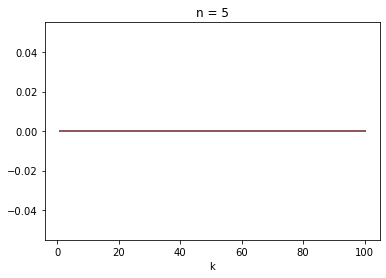

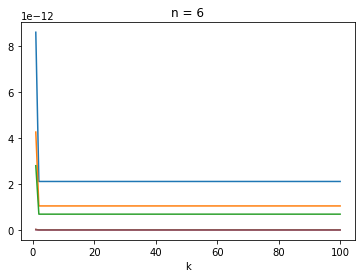

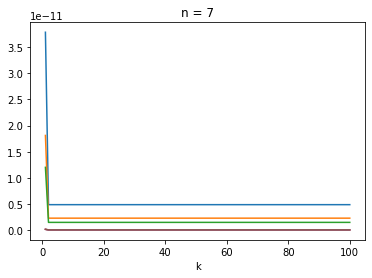

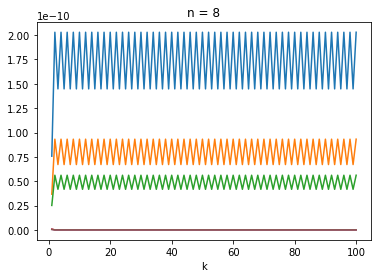

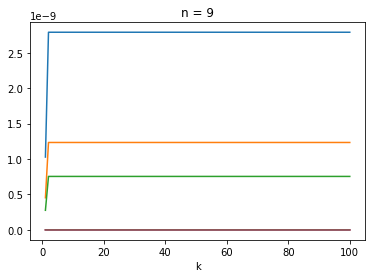

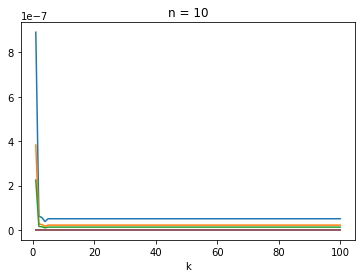

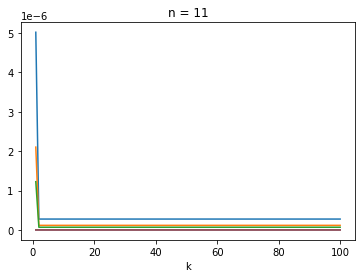

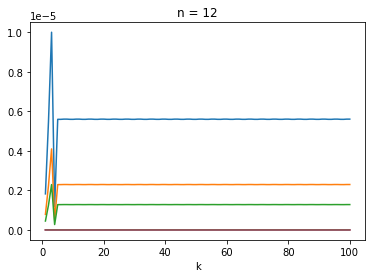

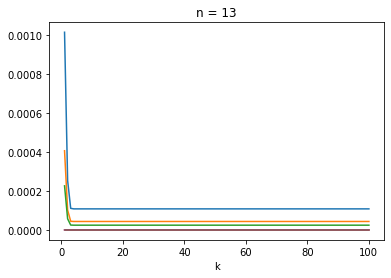

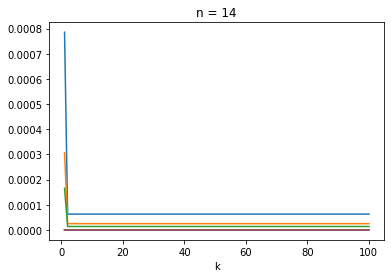

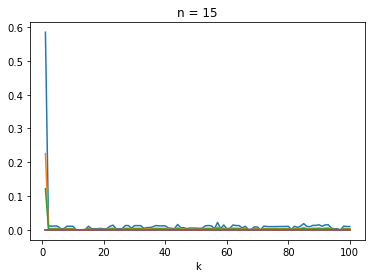

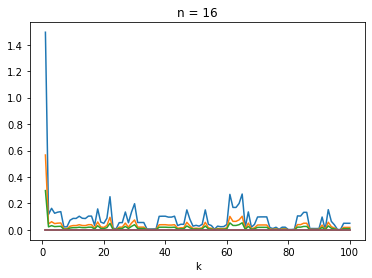

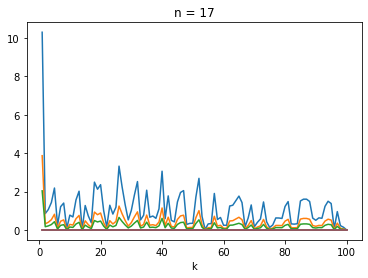

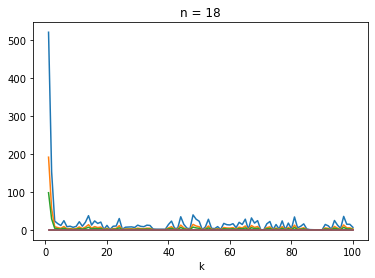

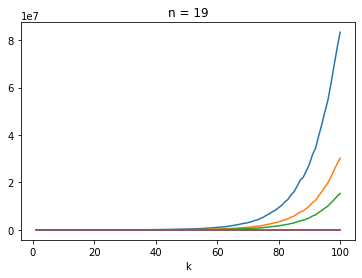

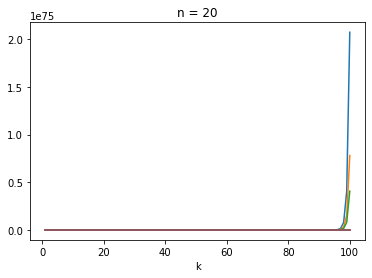

In [5]:
best = plot(False, True)
for i in range(21):
    if best[i]:
        print(f'n = {i}:')
        for k in best[i]:
            print(f'{k:<6}{best[i][k]}')

n = 5:
e_1   (3, 8.926193117986259e-14)
e_2   (3, 5.043981588934396e-14)
e_inf (3, 3.68594044175552e-14)
r_1   (3, 0.0)
r_2   (3, 0.0)
r_inf (3, 0.0)
n = 6:
e_1   (2, 9.041212223337425e-12)
e_2   (2, 4.4844893043037355e-12)
e_inf (2, 2.899458451111059e-12)
r_1   (2, 0.0)
r_2   (2, 0.0)
r_inf (2, 0.0)
n = 7:
e_1   (3, 1.1378120667870917e-11)
e_2   (3, 5.6503695687124835e-12)
e_inf (3, 3.7627678750595805e-12)
r_1   (3, 0.0)
r_2   (3, 0.0)
r_inf (3, 0.0)
n = 8:
e_1   (1, 3.2569380525870884e-10)
e_2   (1, 1.5631577357262572e-10)
e_inf (1, 1.1011680456363138e-10)
r_1   (3, 0.0)
r_2   (3, 0.0)
r_inf (3, 0.0)
n = 9:
e_1   (2, 7.53852869017635e-09)
e_2   (2, 3.339084790483869e-09)
e_inf (2, 2.0549152379700786e-09)
r_1   (2, 0.0)
r_2   (2, 0.0)
r_inf (2, 0.0)
n = 10:
e_1   (5, 1.2670702709272064e-08)
e_2   (5, 5.4725552462426645e-09)
e_inf (5, 3.1399116640074e-09)
r_1   (3, 7.105427357601002e-15)
r_2   (3, 7.105427357601002e-15)
r_inf (3, 7.105427357601002e-15)
n = 11:
e_1   (3, 7.1836453563456

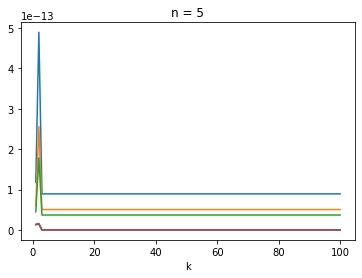

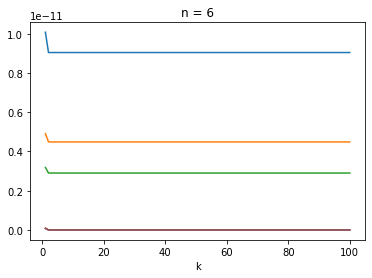

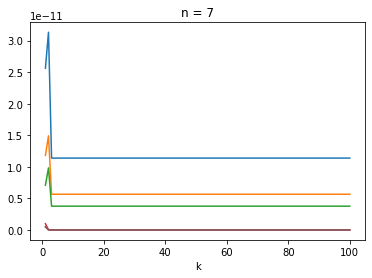

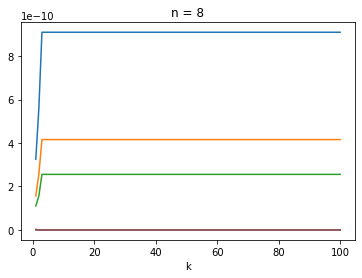

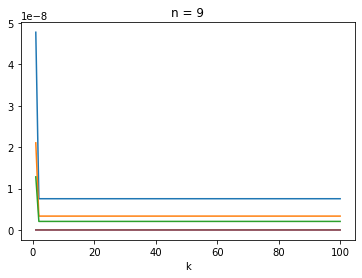

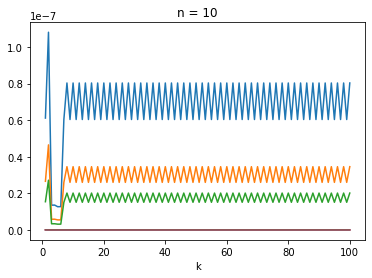

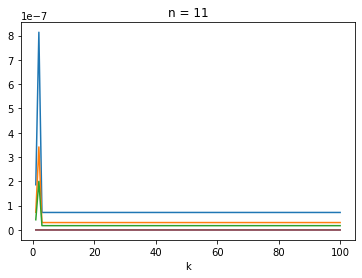

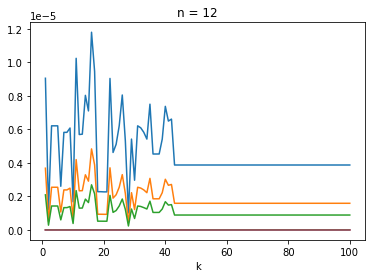

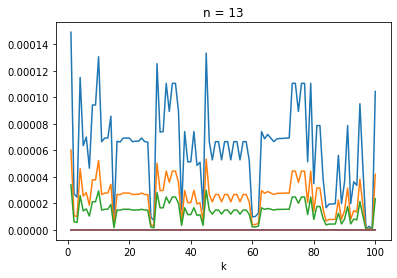

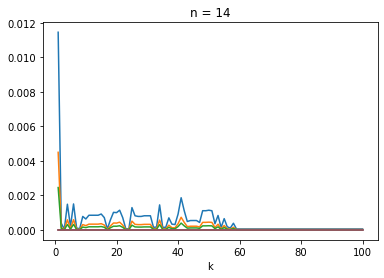

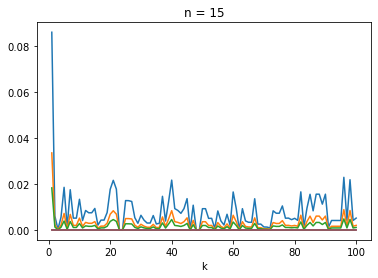

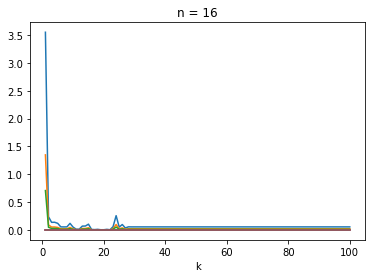

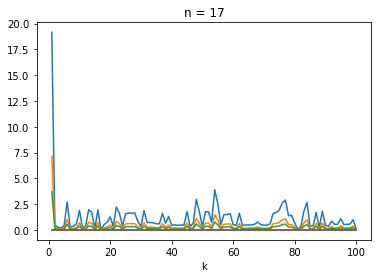

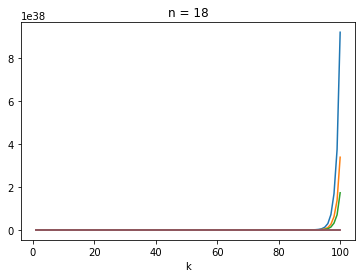

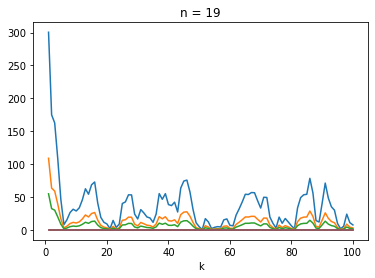

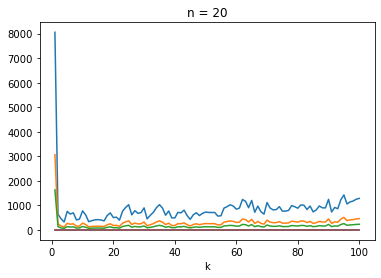

In [6]:
best = plot(True, True)
for i in range(21):
    if best[i]:
        print(f'n = {i}:')
        for k in best[i]:
            print(f'{k:<6}{best[i][k]}')

qr und lr verfahren sind hier wieder sehr vergleichbar. Bei den groesseren matrizen liefert das qr verfahren deutlich frueher bessere ergebnisse als das lr verfahren. aber bei n = 18 ist das ergebniss des lr verfahrens deutlich besser.